In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## N samples

In [2]:
import numpy as np
import tensorflow as tf

In [15]:
# Data preparation
data = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1)
X = data[:,0:4]
y = data[:,4:]
N = X.shape[0]
num_features = X.shape[1]

# add 1
X = np.c_[np.ones((N, 1)), X]

# shuffle
inds = np.arange(N)
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X[:5])
print(y[:5])

[[1.  5.2 2.7 3.9 1.4]
 [1.  7.  3.2 4.7 1.4]
 [1.  5.7 4.4 1.5 0.4]
 [1.  4.4 2.9 1.4 0.2]
 [1.  6.1 2.8 4.7 1.2]]
[[1.]
 [1.]
 [0.]
 [0.]
 [1.]]


In [16]:
# theta
D = num_features + 1
K = 3

theta = tf.Variable(tf.random.normal((D, K), dtype=tf.float64))

# predict
def predict(theta, X):
  return tf.math.softmax(X@theta)

In [9]:
# parameters
lr = 0.01
num_epochs = 1000
losses = [] # for debug

# Có Sparse thì không cần one hot encoding
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
for epoch in range(num_epochs):
  with tf.GradientTape() as t:
    # predict
    y_pred = predict(theta, X)

    # loss
    loss = loss_fn(y, y_pred)

  losses.append(loss)

  # gradient
  dtheta = t.gradient(loss, theta)

  # update
  theta.assign_sub(lr*dtheta)

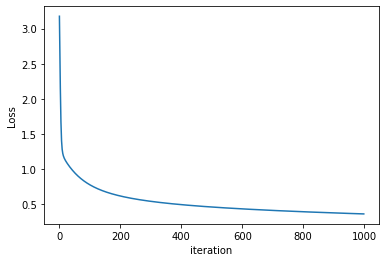

In [19]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()